In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [11]:
df=pd.read_csv("mall_customers.csv")
df.drop(columns="CustomerID",inplace=True)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [12]:
label=LabelEncoder()
for i in df.select_dtypes(include=["object"]):
    df[i]=label.fit_transform(df[i])

df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [13]:
X=df

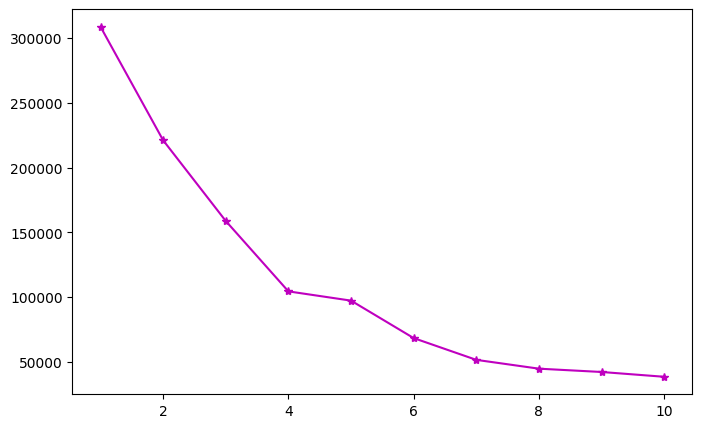

In [14]:
msc=[]
krange=range(1,11)
for k in range(1,11):
    km=KMeans(n_clusters=k,random_state=42)
    km.fit(X)
    msc.append(km.inertia_)
msc
plt.figure(figsize=(8,5))
plt.plot(krange,msc,marker="*",c="m")
plt.show()

In [15]:
model=KMeans(n_clusters=2,random_state=42)
df["clu"]=model.fit_predict(X)


In [16]:
model.n_iter_

3

In [17]:
mo=model.cluster_centers_
mo

array([[ 0.44736842, 40.33552632, 50.90789474, 43.63157895],
       [ 0.41666667, 34.14583333, 91.125     , 71.        ]])

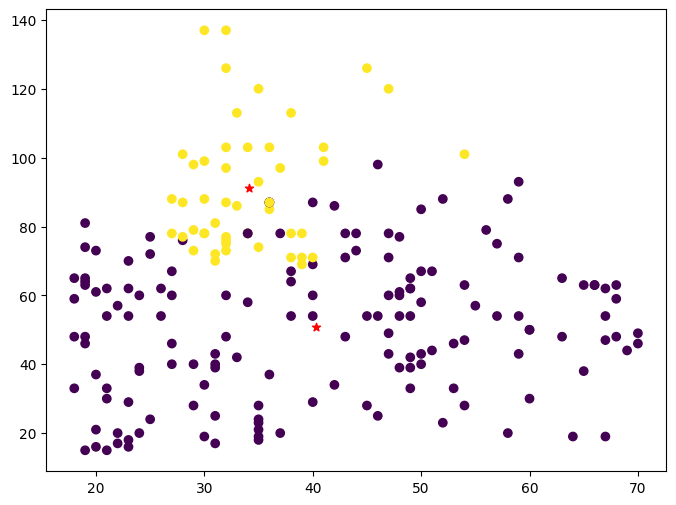

In [18]:
plt.figure(figsize=(8,6))
plt.scatter(mo[:,1],mo[:,2],c="red",marker="*")
plt.scatter(df["Age"],df["Annual Income (k$)"],c=df["clu"])
plt.show()

In [20]:
new=pd.DataFrame({
    "Gender":label.fit_transform(["Male"]),
    "Age":[19],
    "Annual Income (k$)":[15],
    "Spending Score (1-100)":[39]
})
pdr=model.predict(new)
pdr

array([0], dtype=int32)